<div class="alert alert-block alert-info">

Accepted. See comments. 

In [56]:
#Import packages
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer

In [62]:
#import data
df = pd.read_csv('muni_covid1.csv')

*a) new data frame*

In [8]:
#subset data
time0_2 = df[(df.time == 0)|(df.time == 2)]
time0_2

,muni_name,muni_id,year,week,weekrun,time,cases,lockdown
33,København,101,2020,46,46,0,1267,0
35,København,101,2020,48,48,2,1279,0
83,Frederiksberg,147,2020,46,46,0,195,0
85,Frederiksberg,147,2020,48,48,2,146,0
133,Ballerup,151,2020,46,46,0,129,0
...,...,...,...,...,...,...,...,...
4785,Jammerbugt,849,2020,48,48,2,17,1
4833,Aalborg,851,2020,46,46,0,419,0
4835,Aalborg,851,2020,48,48,2,192,0
4883,Hjørring,860,2020,46,46,0,77,1


*b) create dummy and interaction term*

In [21]:
#get dummies, save to df
dummy_t = pd.get_dummies(time0_2['time'])
time0_2['time2_d'] = dummy_t[2]

<ipython-input-21-305d318a7741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time0_2['time2_d'] = dummy_t[2]


In [23]:
#interaction term
time0_2['interaction'] = time0_2['lockdown'] * time0_2['time2_d']

<ipython-input-23-82e6112ed99b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time0_2['interaction'] = time0_2['lockdown'] * time0_2['time2_d']


In [24]:
time0_2

,muni_name,muni_id,year,week,weekrun,time,cases,lockdown,time2_d,interaction
33,København,101,2020,46,46,0,1267,0,0,0
35,København,101,2020,48,48,2,1279,0,1,0
83,Frederiksberg,147,2020,46,46,0,195,0,0,0
85,Frederiksberg,147,2020,48,48,2,146,0,1,0
133,Ballerup,151,2020,46,46,0,129,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4785,Jammerbugt,849,2020,48,48,2,17,1,1,1
4833,Aalborg,851,2020,46,46,0,419,0,0,0
4835,Aalborg,851,2020,48,48,2,192,0,1,0
4883,Hjørring,860,2020,46,46,0,77,1,0,0


*c)Regres the weekly number of cases on the treatment dummy, the time dummy and the interaction terms between the two. Do these results suggest a noticeable effect of the lockdown in the week after it has been introduced?*


In [27]:
#fit model
model = smf.ols(formula = 'cases ~lockdown + time2_d + interaction', data = time0_2)
results = model.fit(cov_type = 'HC0')

print(results.conf_int(0.1))
results.summary()

                     0           1
Intercept    52.913779  103.284023
lockdown    -61.754615   -4.157473
time2_d     -34.384299   35.944739
interaction -54.782868   26.365286


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                     3.863
Date:                Mon, 01 Mar 2021   Prob (F-statistic):             0.0103
Time:                        14:24:27   Log-Likelihood:                -1245.4
No. Observations:                 196   AIC:                             2499.
Df Residuals:                     192   BIC:                             2512.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      78.0989     15.311      5.101      0.000      48.089     108.109
lockdown      -32.9560     17.508     -1.882      0.060     -67.272       1.360
time2_d         0.7802     21.379      0.036      0.971     -41.121      42.681
interaction   -14.2088     24.667     -0.576      0.565     -62.556      34.138
==============================================================================
Omnibus:                      291.457   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25048.141
Skew:                           6.839   Prob(JB):                         0.00
Kurtosis:                      56.666   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

The lockdown had a negative effect on number of cases (-32.9 cases) that is significant at the 90% confidence level, but not at the 95% confidence level. 

time2_d = slope before treatment

interaction = difference between the before and after treatment slope 

<div class="alert alert-block alert-info">
This one is on us as we forgot to correct ourselves here during class - the coefficient of interest in this case is the intercept. See solution for why this is. We will touch on this in the walkthrough as well.

*d) Open the raw data and keep only observations from time period 0 until time period 12.*

In [63]:
df_12 = df[(df.time <= 12) & (df.time >= 0 )]

*e) Create dummies for points in time, + interaction with lockdown*

In [44]:
df_12 = pd.get_dummies(df_12, columns=['time'])


In [45]:
df_12.head()

,muni_name,muni_id,year,week,weekrun,cases,lockdown,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12
33,København,101,2020,46,46,1267,0,1,0,0,0,0,0,0,0,0,0,0,0,0
34,København,101,2020,47,47,1322,0,0,1,0,0,0,0,0,0,0,0,0,0,0
35,København,101,2020,48,48,1279,0,0,0,1,0,0,0,0,0,0,0,0,0,0
36,København,101,2020,49,49,1641,0,0,0,0,1,0,0,0,0,0,0,0,0,0
37,København,101,2020,50,50,1829,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [54]:
#Interaction effects for all variables that start with a "t" (aka our time variable) 
#GRILLED CHEESE PROGRAMMING! 
for item in df_12:
    if item[0] == 't':
        df_12[item+'int'] = df_12[item] * df_12['lockdown']
        

*f) ATT of the lockdown in each time period after it occurs using differences-in-differences. Do this by regressing the weekly num- ber of cases on the treatment dummy, as well as the time dummies and the interaction terms*

In [64]:
#run regressions on all time periods + interactions
model = smf.ols(formula = 'cases ~ lockdown*C(time)', data = df_12)
results = model.fit(cov_type = 'HC0')

results.summary()   


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     15.03
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.76e-55
Time:                        15:17:01   Log-Likelihood:                -8949.2
No. Observations:                1274   AIC:                         1.795e+04
Df Residuals:                    1248   BIC:                         1.808e+04
Df Model:                          25                                         
Covariance Type:                  HC0                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 78.0989     15.311      5.101      0.000      48.089     108.109
C(time)[T.1]              -0.8242     21.857     -0.038      0.970     -43.663      42.014
C(time)[T.2]               0.7802     21.379      0.036      0.971     -41.121      42.681
C(time)[T.3]              12.1758     24.147      0.504      0.614     -35.151      59.503
C(time)[T.4]              16.2637     25.916      0.628      0.530     -34.530      67.057
C(time)[T.5]              60.3956     36.373      1.660      0.097     -10.893     131.684
C(time)[T.6]             157.7582     62.293      2.533      0.011      35.666     279.850
C(time)[T.7]             184.1209     56.633      3.251      0.001      73.122     295.119
C(time)[T.8]             100.2308     35.192      2.848      0.004      31.256     169.206
C(time)[T.9]              74.6484     28.294      2.638      0.008      19.194     130.103
C(time)[T.10]             40.1538     24.539      1.636      0.102      -7.941      88.249
C(time)[T.11]             -5.5385     19.740     -0.281      0.779     -44.229      33.152
C(time)[T.12]            -23.0440     17.788     -1.295      0.195     -57.908      11.820
lockdown                 -32.9560     17.508     -1.882      0.060     -67.272       1.360
lockdown:C(time)[T.1]     -6.6044     25.913     -0.255      0.799     -57.393      44.184
lockdown:C(time)[T.2]    -14.2088     24.667     -0.576      0.565     -62.556      34.138
lockdown:C(time)[T.3]    -41.7473     25.803     -1.618      0.106     -92.320       8.825
lockdown:C(time)[T.4]    -49.6923     27.572     -1.802      0.071    -103.732       4.347
lockdown:C(time)[T.5]    -97.2527     37.380     -2.602      0.009    -170.516     -23.990
lockdown:C(time)[T.6]   -167.1868     63.338     -2.640      0.008    -291.328     -43.046
lockdown:C(time)[T.7]   -165.9780     58.294     -2.847      0.004    -280.233     -51.723
lockdown:C(time)[T.8]    -61.3736     40.577     -1.513      0.130    -140.903      18.156
lockdown:C(time)[T.9]    -47.0769     33.614     -1.401      0.161    -112.960      18.806
lockdown:C(time)[T.10]   -20.5824     29.704     -0.693      0.488     -78.801      37.636
lockdown:C(time)[T.11]     6.2527     23.298      0.268      0.788     -39.411      51.917
lockdown:C(time)[T.12]    13.4725     21.233      0.635      0.526     -28.143      55.088
==============================================================================
Omnibus:                     2170.519   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1507287.420
Skew:                          11.216   Prob(JB):                         0.00
Kurtosis:                     170.008   Cond. No.                         54.4
=================================================

Do these results suggest a noticeable effect of the lockdown?

Lockdown seems to decrease the number of cases with 32.9 cases at a 90% significance level. 

The interaction effect is our ATE. As we can see, around 4 week four, the lock down starts having a negative effect on cases that is significant at the 90% significance level. Because of the incubation time, this also makes sense. 

<div class="alert alert-block alert-info">
Yes to the latter. For the same reason as above we shoud discard the lockdown coef a bit (this is actually the effect before treatment). Once again this one is on me/us.

*g) Discuss what assumptions need to hold in order for your estimated ATEs from f) to be credible.*

Parallel trends assumption: we assume that the treatment and control groups have constant levels of differences between them before the treatment kicks in, after which the trends will start to diverge. In this case it means that municipalities that were/weren't locked down varied together before the lockdown, after which the effects of the treatment should "kick in".

*h) which variable should we cluster on?*

It makes sense to cluster around the municipalities, because we expect the residuals to be different depending on where we are in Denmark. 

<div class="alert alert-block alert-info">
Check solution

*i) clustered standard errors for each of the ATEs and use these to construct 95 pct confidence intervals.*

In [82]:
#run regression with clustered errors
model = smf.ols(formula = 'cases ~lockdown + time2_d + interaction', data = time0_2)
results = model.fit(cov_type = 'cluster', cov_kwds = {'groups': time0_2['muni_name']})

results.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                     2.531
Date:                Mon, 01 Mar 2021   Prob (F-statistic):             0.0616
Time:                        16:05:30   Log-Likelihood:                -1245.4
No. Observations:                 196   AIC:                             2499.
Df Residuals:                     192   BIC:                             2512.
Df Model:                           3                                         
Covariance Type:              cluster                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      78.0989     15.510      5.035      0.000      47.700     108.498
lockdown      -32.9560     17.735     -1.858      0.063     -67.717       1.804
time2_d         0.7802      4.276      0.182      0.855      -7.600       9.160
interaction   -14.2088     10.514     -1.351      0.177     -34.815       6.398
==============================================================================
Omnibus:                      291.457   Durbin-Watson:                   0.573
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25048.141
Skew:                           6.839   Prob(JB):                         0.00
Kurtosis:                      56.666   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

The p-values have changed a little bit, but the overall picture is the same.

*j) Minus 8 to +12*

In [79]:
df_8_12 = df[(df.time <= 12) & (df.time >= -9)]

*k) regression weekly cases on the treatment dummy and all the time dummies and interactions*

In [87]:
#run regressions on all time periods + interactions
model = smf.ols(formula = 'cases ~ lockdown*C(time)', data = df_8_12)
results = model.fit(cov_type = 'cluster', cov_kwds = {'groups': df_8_12['muni_name']})

results.summary()   

/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 43, but rank is 28
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     10.12
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.90e-18
Time:                        16:07:55   Log-Likelihood:                -14619.
No. Observations:                2156   AIC:                         2.933e+04
Df Residuals:                    2112   BIC:                         2.958e+04
Df Model:                          43                                         
Covariance Type:              cluster                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.1758      1.578      3.912      0.000       3.082       9.270
C(time)[T.-8]              7.4615      2.501      2.984      0.003       2.560      12.363
C(time)[T.-7]             16.6703      4.486      3.716      0.000       7.877      25.463
C(time)[T.-6]             27.1538      7.497      3.622      0.000      12.461      41.847
C(time)[T.-5]             32.1868      7.157      4.497      0.000      18.159      46.215
C(time)[T.-4]             22.8132      4.400      5.184      0.000      14.188      31.438
C(time)[T.-3]             21.0769      3.882      5.430      0.000      13.469      28.685
C(time)[T.-2]             25.7582      4.901      5.255      0.000      16.152      35.365
C(time)[T.-1]             53.6044     10.730      4.996      0.000      32.573      74.636
C(time)[T.0]              71.9231     14.080      5.108      0.000      44.328      99.518
C(time)[T.1]              71.0989     14.344      4.957      0.000      42.986      99.212
C(time)[T.2]              72.7033     13.654      5.325      0.000      45.943      99.464
C(time)[T.3]              84.0989     17.465      4.815      0.000      49.869     118.329
C(time)[T.4]              88.1868     19.734      4.469      0.000      49.508     126.865
C(time)[T.5]             132.3187     31.995      4.136      0.000      69.610     195.027
C(time)[T.6]             229.6813     59.809      3.840      0.000     112.458     346.904
C(time)[T.7]             256.0440     53.852      4.755      0.000     150.495     361.593
C(time)[T.8]             172.1538     30.684      5.610      0.000     112.014     232.294
C(time)[T.9]             146.5714     22.670      6.465      0.000     102.138     191.005
C(time)[T.10]            112.0769     17.976      6.235      0.000      76.845     147.309
C(time)[T.11]             66.3846     11.198      5.928      0.000      44.436      88.333
C(time)[T.12]             48.8791      7.777      6.285      0.000      33.636      64.122
lockdown                  -1.7473      2.587     -0.675      0.499      -6.818       3.323
lockdown:C(time)[T.-8]    -6.1758      2.830     -2.182      0.029     -11.722      -0.629
lockdown:C(time)[T.-7]    -0.3846      8.177     -0.047      0.962     -16.411      15.642
lockdown:C(time)[T.-6]   -10.8681     10.679     -1.018      0.309     -31.799      10.062
lockdown:C(time)[T.-5]   -20.4725      8.508     -2.406      0.016     -37.147      -3.798
lockdown:C(time)[T.-4]    -3.8132      8.295     -0.460      0.646     -20.071      12.444
lockdown:C(time)[T.-3]     1.3516      9.046      0.149      0.881     -16.379      19.082
lockdown:C(time)[T.-2]     3.3846     11.659      0.290      0.772     -19.466      26.235
lockdown:C(time)[T.-1]   -11.4615     14.780     -0.775      0.438     -40.431  

As we can see, the treatment and control groups are not significantly different from each other until the lockdown kicks in, which means that the lockdown worked, and the parallell trends assumptions holds. Using the clustered error also ensures we take into account the residual variability between the municipalities. 

These 

<div class="alert alert-block alert-info">
They are though - see period -8,-5,0. Also chek solution for how to drop the desired dummy within the regression itself.

*l) graph of estimated ATE of the lockdown on cases in each time period from -8 and until time period 12*

In [91]:
import seaborn as sns

                              coef        std
lockdown:C(time)[T.-8]   -6.175824   2.829889
lockdown:C(time)[T.-7]   -0.384615   8.176937
lockdown:C(time)[T.-6]  -10.868132  10.678996
lockdown:C(time)[T.-5]  -20.472527   8.507631
lockdown:C(time)[T.-4]   -3.813187   8.294823
lockdown:C(time)[T.-3]    1.351648   9.046405
lockdown:C(time)[T.-2]    3.384615  11.658660
lockdown:C(time)[T.-1]  -11.461538  14.780360
lockdown:C(time)[T.0]   -31.208791  15.802632
lockdown:C(time)[T.1]   -37.813187  17.899318
lockdown:C(time)[T.2]   -45.417582  16.311329
lockdown:C(time)[T.3]   -72.956044  17.858375
lockdown:C(time)[T.4]   -80.901099  20.326330
lockdown:C(time)[T.5]  -128.461538  32.063991
lockdown:C(time)[T.6]  -198.395604  60.250262
lockdown:C(time)[T.7]  -197.186813  54.758803
lockdown:C(time)[T.8]   -92.582418  35.573473
lockdown:C(time)[T.9]   -78.285714  27.110978
lockdown:C(time)[T.10]  -51.791209  22.408781
lockdown:C(time)[T.11]  -24.956044  13.693060
lockdown:C(time)[T.12]  -17.736264

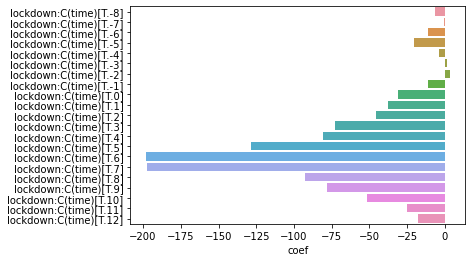

In [128]:
graph_df = pd.DataFrame()
std_df = pd.DataFrame()

graph_df['coef'] = results.params
std_df['std'] = results.bse


join_df = pd.concat([graph_df, std_df], axis=1, join="inner")


#hardcode to only get the interaction effects
join_df = join_df[-21:]

print(join_df)
sns.barplot(x= 'coef', y =join_df.index, data = join_df)

Again, we can see that the lockdown has a gradual build up effect on the number of cases.